In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as teg

In [20]:
# i/o params
loc = "/scratch/hcm7920/ambData/"
conc = [0,40,80,100]

# plot params
deepIndex = 50
xRange = np.linspace(0,500,250)
xRMeters = np.linspace(0,500*1000,250)

# phys params
g = 9.81
rhoConst = 1029

In [28]:
# load
rhoSteady = np.load(loc+"channelMeanRhoSpinup.npy")[:,:,1,:]
n2Steady  = np.load(loc+"channelMeanN2Spinup.npy")[:,:,1,:]
uSteady   = np.load(loc+"channelMeanUSpinup.npy")[:,:,1,:]
vSteady   = np.load(loc+"channelMeanVSpinup.npy")[:,:,1,:]
wSteady   = np.load(loc+"channelMeanWSpinup.npy")[:,:,1,:]

rhoTarget = np.load(loc+"channelMeanRhoSpinup.npy")[:,:,0,:]
n2Target  = np.load(loc+"channelMeanN2Spinup.npy")[:,:,0,:]
uTarget   = np.load(loc+"channelMeanUSpinup.npy")[:,:,0,:]
vTarget   = np.load(loc+"channelMeanVSpinup.npy")[:,:,0,:]
wTarget   = np.load(loc+"channelMeanWSpinup.npy")[:,:,0,:]

levs = np.load(loc+"gridLevs.npy")
levFaces = np.load(loc+"gridLevFaces.npy")

n2Steady *= -g/rhoConst
n2Target *= -g/rhoConst

Text(0.5, 0.98, 'Channel mean density & $\\mathrm{N}^2$ profiles @ channel center')

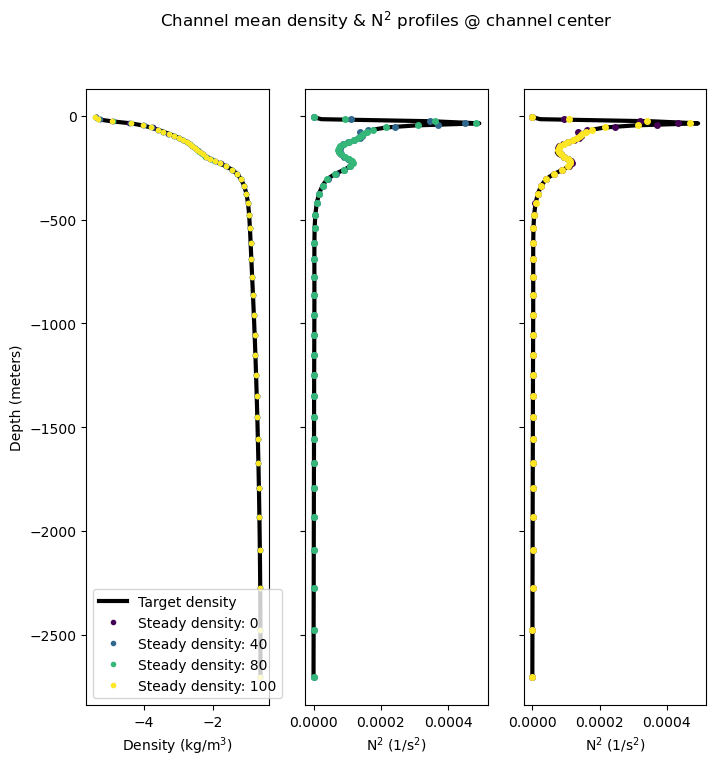

In [5]:
fig,axs = plt.subplots(nrows=1,ncols=3,sharey=True,figsize=(8,8))
colors = plt.cm.viridis(np.linspace(0,1,len(conc)))
cO2 = len(conc)//2

axs[0].plot(rhoTarget[100,:deepIndex,0],levs[:deepIndex],
            label="Target density",linewidth=3,color='k')
for i in range(len(conc)):
    axs[0].plot(rhoSteady[100,:deepIndex,i],levs[:deepIndex],'.',
                label=f"Steady density: {conc[i]}",linewidth=3,color=colors[i])
axs[0].set_xlabel("Density $(\mathrm{kg}/\mathrm{m^3})$")
axs[0].set_ylabel("Depth (meters)")
axs[0].legend()

axs[1].plot(n2Target[100,:deepIndex,0],levs[:deepIndex],
            label="Target n2",linewidth=3,color='k')
for i in [1,2]:
    axs[1].plot(n2Steady[100,:deepIndex,i],levs[:deepIndex],'.',
                label=f"Steady n2: {conc[i]}",markersize=8,color=colors[i])
axs[1].set_xlabel("$\mathrm{N}^2$ ($1/\mathrm{s}^2$)")

axs[2].plot(n2Target[100,:deepIndex,0],levs[:deepIndex],
            label="Target n2",linewidth=3,color='k')
for i in [0,3]:
    axs[2].plot(n2Steady[100,:deepIndex,i],levs[:deepIndex],'.',
                label=f"Steady n2: {conc[i]}",markersize=8,color=colors[i])
axs[2].set_xlabel("$\mathrm{N}^2$ ($1/\mathrm{s}^2$)")

fig.suptitle("Channel mean density & $\mathrm{N}^2$ profiles @ channel center")

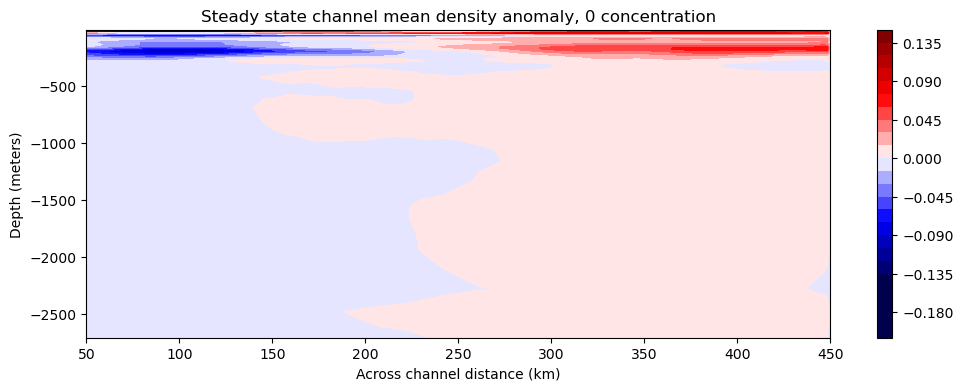

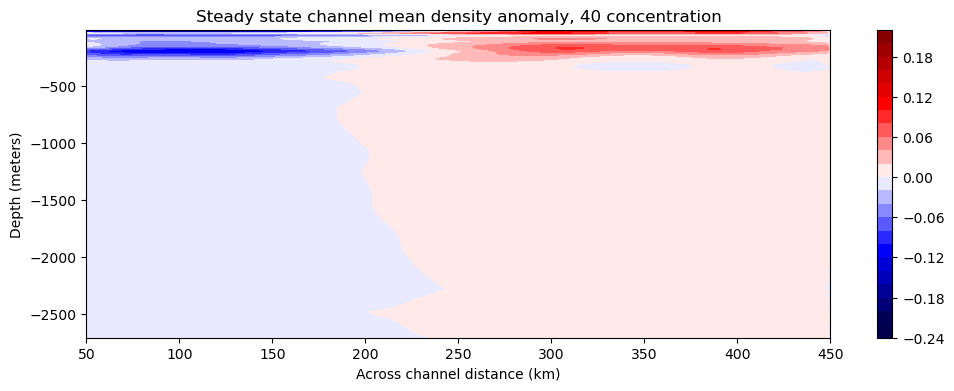

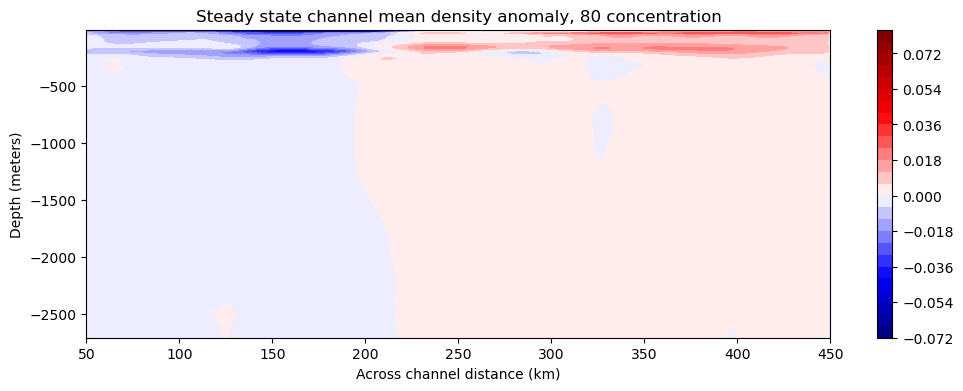

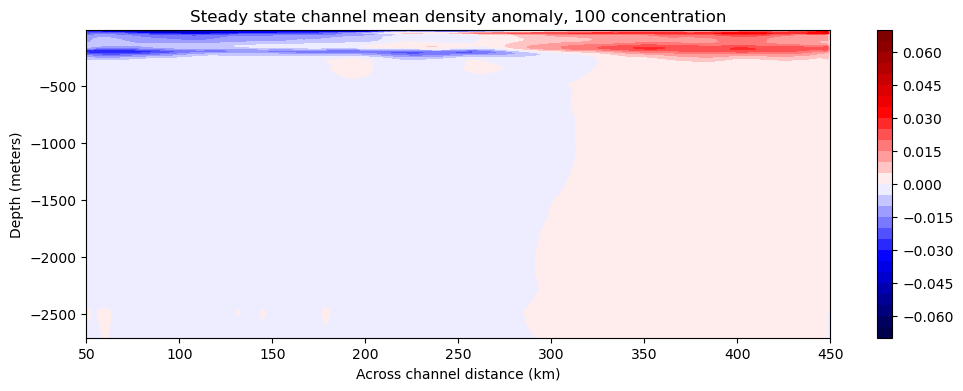

In [9]:
for i in range(len(conc)):
    plt.figure(figsize=(12,4))
    data=-rhoSteady[:,:deepIndex,i].T+rhoTarget[:,:deepIndex,i].T
    myMax=np.abs(np.max(data))
    plt.contourf(xRange,levs[:deepIndex],data,
                26,vmax=myMax,vmin=-myMax,cmap="seismic")
    plt.colorbar()
    plt.title(f"Steady state channel mean density anomaly, {conc[i]} concentration")
    plt.xlabel("Across channel distance (km)")
    plt.ylabel("Depth (meters)")

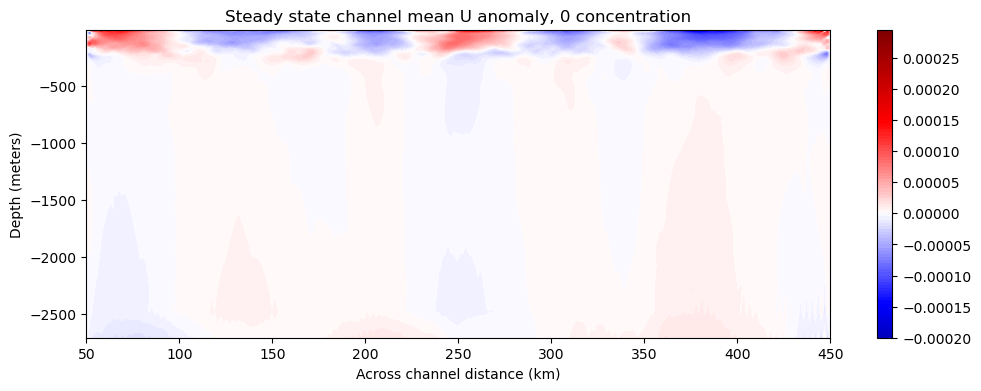

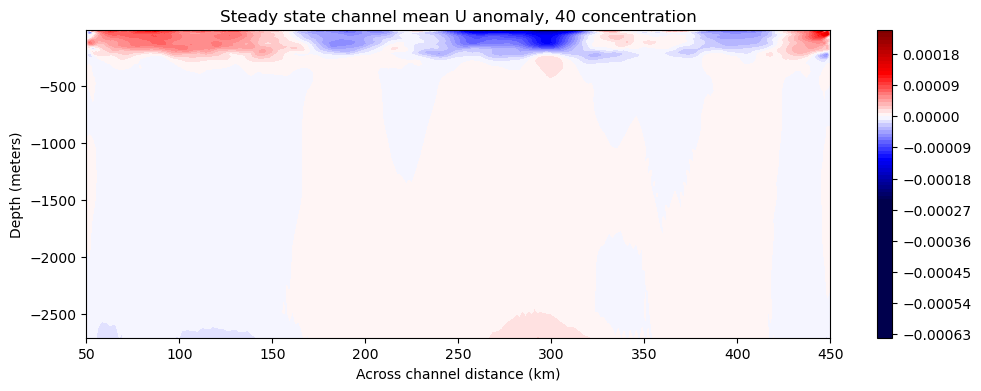

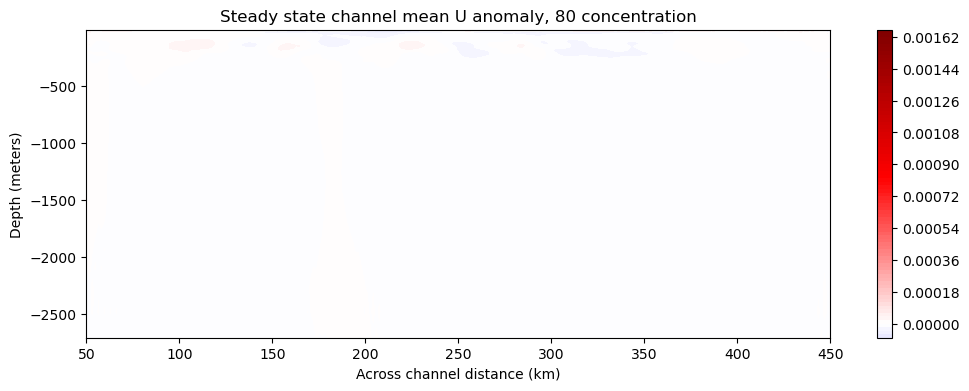

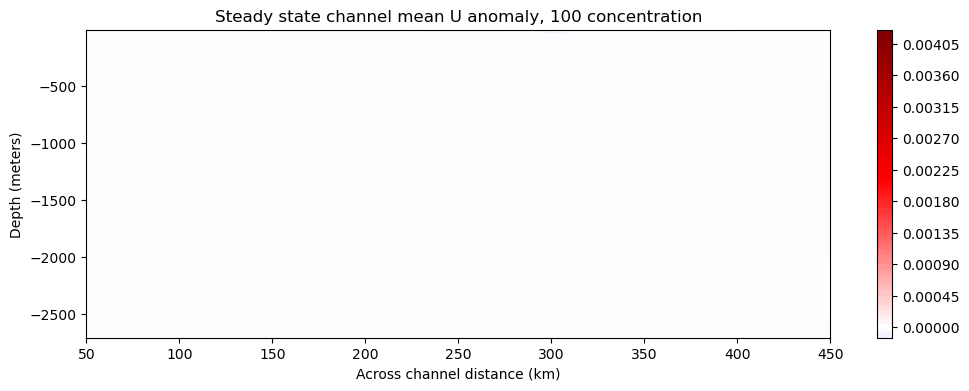

In [7]:
for i in range(len(conc)):
    plt.figure(figsize=(12,4))
    data=uSteady[:-1,:deepIndex,i].T#-uTarget[:,:deepIndex,i].T
    myMax=np.abs(np.max(data))
    plt.contourf(xRange[:],levs[:deepIndex],data,
                100,cmap='seismic',vmax=myMax,vmin=-myMax)
    plt.colorbar()
    plt.title(f"Steady state channel mean U anomaly, {conc[i]} concentration")
    plt.xlabel("Across channel distance (km)")
    plt.ylabel("Depth (meters)")

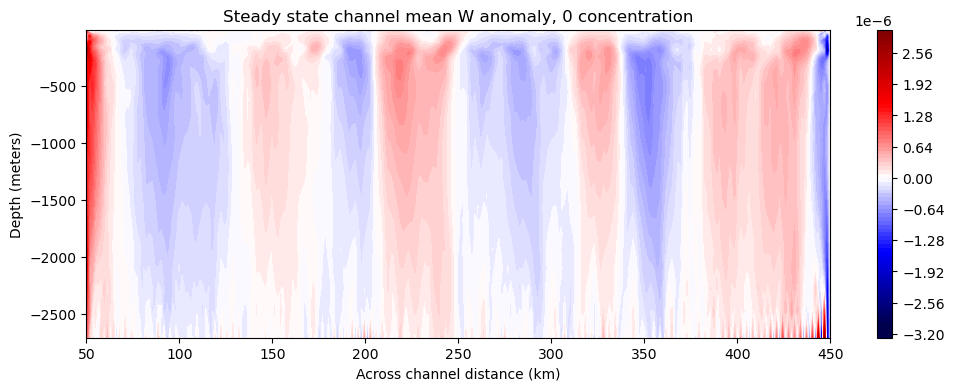

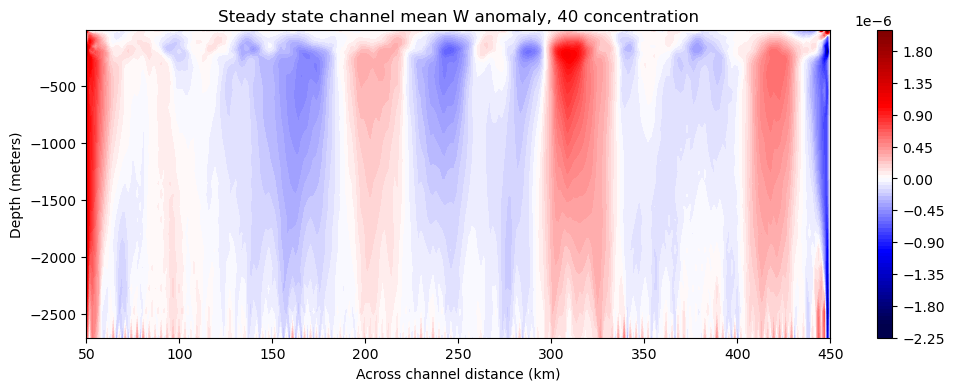

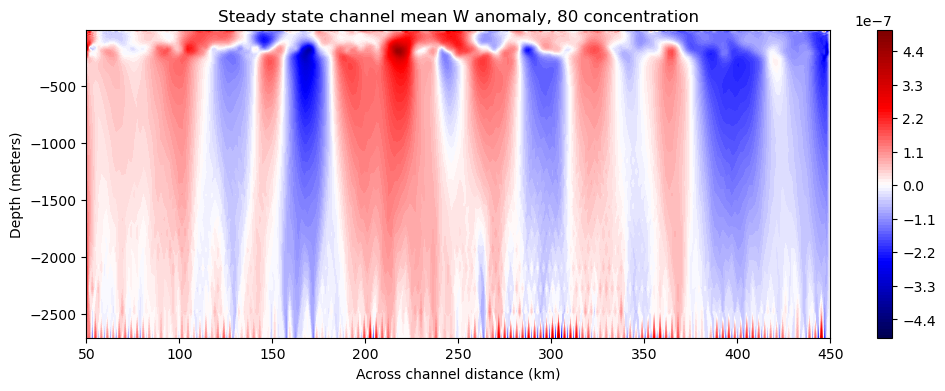

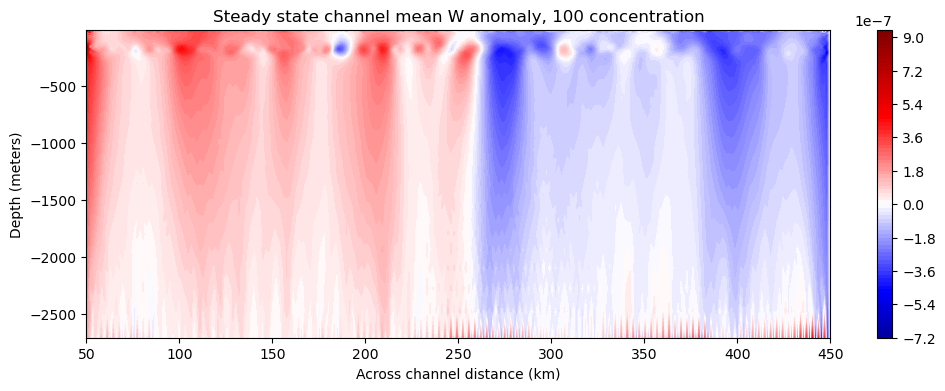

In [8]:
for i in range(len(conc)):
    plt.figure(figsize=(12,4))
    data=wSteady[:,:deepIndex,i].T#-wTarget[:,:deepIndex,i].T-wSteady[:,:deepIndex,i].T
    myMax=np.abs(np.max(data))
    plt.contourf(xRange,levs[:deepIndex],data,
                100,cmap='seismic',vmax=myMax,vmin=-myMax)
    plt.colorbar()
    plt.title(f"Steady state channel mean W anomaly, {conc[i]} concentration")
    plt.xlabel("Across channel distance (km)")
    plt.ylabel("Depth (meters)")

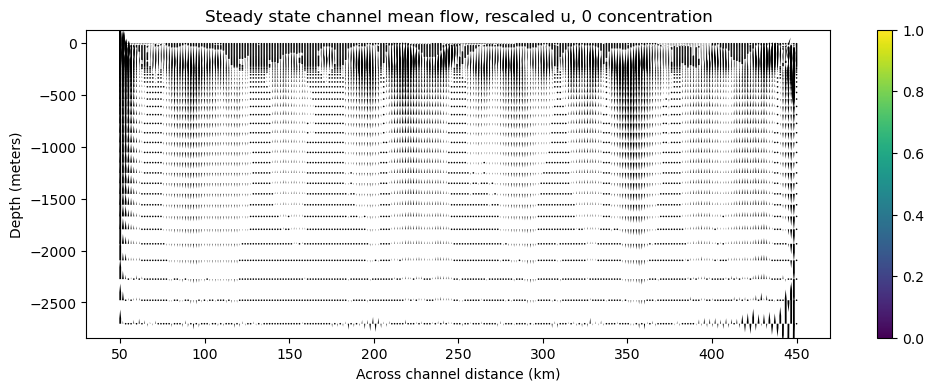

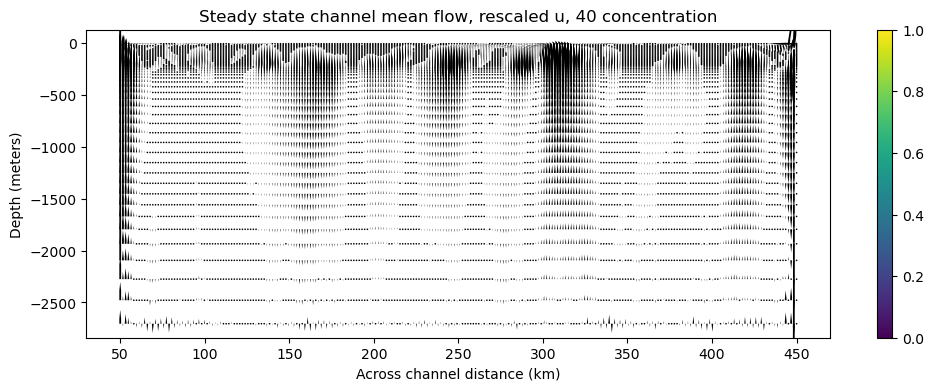

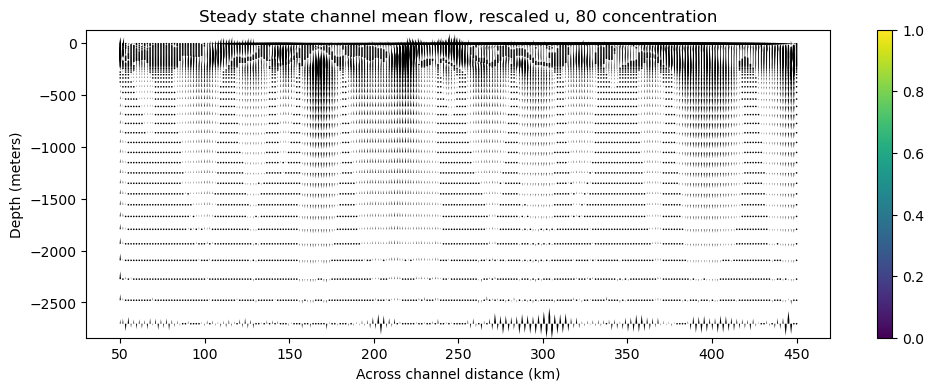

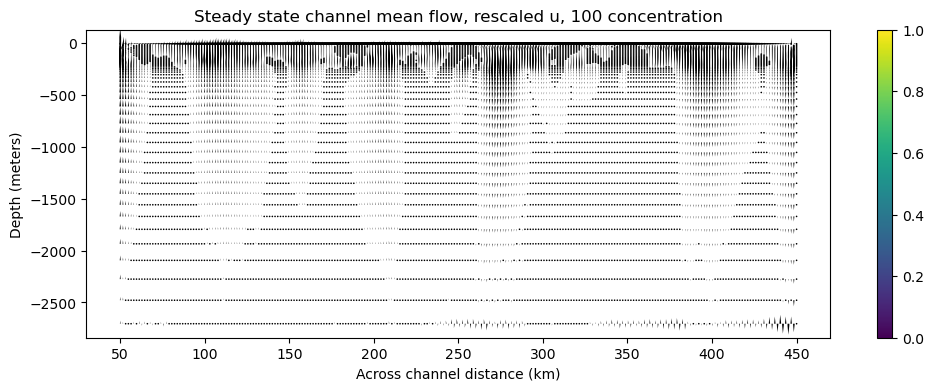

In [10]:

for i in range(len(conc)):
    plt.figure(figsize=(12,4))
    myMax=np.abs(np.max(data))
    plt.quiver(xRange, levs[:deepIndex],
               uSteady[:-1,:deepIndex,i].T*1e-3, wSteady[:,:deepIndex,i].T,
               headwidth=1)
    plt.colorbar()
    plt.title(f"Steady state channel mean flow, rescaled u, {conc[i]} concentration")
    plt.xlabel("Across channel distance (km)")
    plt.ylabel("Depth (meters)")

In [45]:
streamF1 = teg.cumulative_trapezoid(wSteady[:,:,:], x=xRMeters[:], axis=0, initial=0)
meanF1 = streamF1.mean(axis=(0,1))
maxLev1 = (streamF1-meanF1).max(axis=(0,1,2))
contourLevels1 = np.linspace(-maxLev1,maxLev1,30)

streamF2 = teg.cumulative_trapezoid(-uSteady[:-1,::-1,:], x=levs[::-1], axis=1, initial=0)
meanF2 = streamF2.mean(axis=(0,1))
maxLev2 = (streamF2-meanF2).max(axis=(0,1,2))
contourLevels2 = np.linspace(-maxLev2,maxLev2,30)

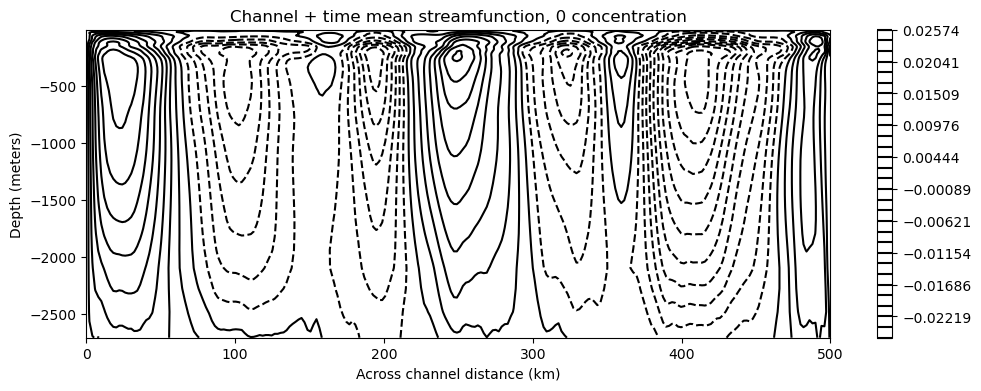

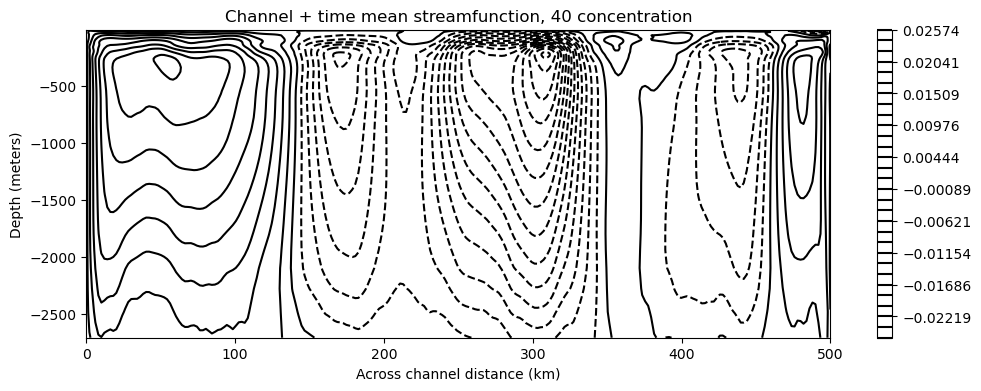

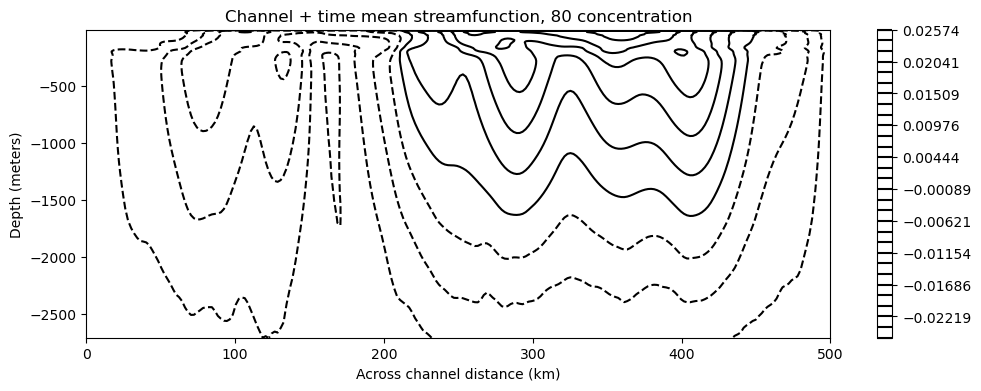

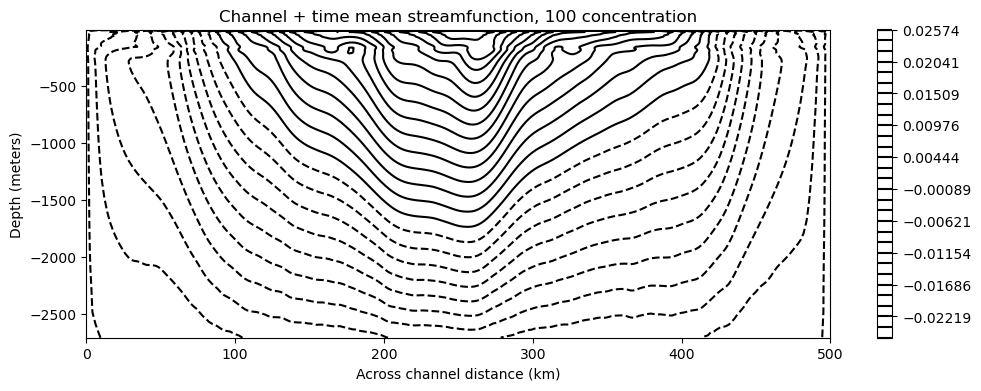

In [47]:

deepIndex = 50
for i in range(len(conc)):
#     plt.figure(figsize=(12,4))
#     myMax=np.abs(np.max(data))
# #     plt.contour(xRange,levs[:deepIndex],streamF1[:,:deepIndex,i].T,26,colors="black")
#     plt.contour(xRange,levs[:deepIndex],streamF2[:,:deepIndex,i].T,26
#                ,colors="black")
#     plt.colorbar()
#     plt.title(f"Channel time mean streamfunction, u from bottom, {conc[i]} concentration")
#     plt.xlabel("Across channel distance (km)")
#     plt.ylabel("Depth (meters)")
    
    plt.figure(figsize=(12,4))
    myMax=np.abs(np.max(data))
    plt.contour(xRange,levs[:deepIndex],streamF1[:,:deepIndex,i].T-meanF1[i],
                contourLevels1,colors="black")
#     plt.contour(xRange,levs[:deepIndex],streamF2[:,:deepIndex,i].T,26,colors="blue")
    plt.colorbar()
    plt.title(f"Channel + time mean streamfunction, {conc[i]} concentration")
    plt.xlabel("Across channel distance (km)")
    plt.ylabel("Depth (meters)")
    plt.savefig(f"/home/hcm7920/experiments/arcticMiddepthBI/plots/psiSectionChannelTimeMean{conc[i]}.png"
               ,bbox_inches="tight",pad_inches=0)

In [ ]:
for i in range(len(conc)):
    plt.figure(figsize=(12,4))
#     data=vSteady[:,:deepIndex,i].T#-vTarget[:,:deepIndex,i].T-vSteady[:,:deepIndex,i].T
    myMax=np.abs(np.max(data))
    plt.contour(xRange,levs[:deepIndex],vSteady[:,:deepIndex,i].T,
                20,cmap='viridis')#,vmax=myMax,vmin=-myMax)
    plt.colorbar()
    plt.title(f"Steady state channel mean V fields, {conc[i]} concentration")
    plt.xlabel("Across channel distance (km)")
    plt.ylabel("Depth (meters)")